# Inicialización

## Importar librerías

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.image as img
import matplotlib.pyplot as plt
import tensorflow as tf

## Importar data

In [2]:
files = [f for f in os.listdir('lsp_dataset/images') if os.path.isfile(os.path.join('lsp_dataset/images', f))]
print('Inputs: ')
for f in files:
    print(f)

Inputs: 
im0001.jpg
im0002.jpg
im0003.jpg
im0004.jpg
im0005.jpg
im0006.jpg
im0007.jpg
im0008.jpg
im0009.jpg
im0010.jpg
im0011.jpg
im0012.jpg
im0013.jpg
im0014.jpg
im0015.jpg
im0016.jpg
im0017.jpg
im0018.jpg
im0019.jpg
im0020.jpg
im0021.jpg
im0022.jpg
im0023.jpg
im0024.jpg
im0025.jpg
im0026.jpg
im0027.jpg
im0028.jpg
im0029.jpg
im0030.jpg
im0031.jpg
im0032.jpg
im0033.jpg
im0034.jpg
im0035.jpg
im0036.jpg
im0037.jpg
im0038.jpg
im0039.jpg
im0040.jpg
im0041.jpg
im0042.jpg
im0043.jpg
im0044.jpg
im0045.jpg
im0046.jpg
im0047.jpg
im0048.jpg
im0049.jpg
im0050.jpg
im0051.jpg
im0052.jpg
im0053.jpg
im0054.jpg
im0055.jpg
im0056.jpg
im0057.jpg
im0058.jpg
im0059.jpg
im0060.jpg
im0061.jpg
im0062.jpg
im0063.jpg
im0064.jpg
im0065.jpg
im0066.jpg
im0067.jpg
im0068.jpg
im0069.jpg
im0070.jpg
im0071.jpg
im0072.jpg
im0073.jpg
im0074.jpg
im0075.jpg
im0076.jpg
im0077.jpg
im0078.jpg
im0079.jpg
im0080.jpg
im0081.jpg
im0082.jpg
im0083.jpg
im0084.jpg
im0085.jpg
im0086.jpg
im0087.jpg
im0088.jpg
im0089.jpg
im0090.jpg
i

First:
[[ 29.74645941 143.34544031   0.        ]
 [ 30.5501068  117.22690013   0.        ]
 [ 28.94281202  84.67918082   0.        ]
 [ 43.00664135  85.08100452   0.        ]
 [ 42.20299396 111.1995447    0.        ]
 [ 42.60481765 132.89802424   0.        ]
 [ 24.52275137  52.9351089    0.        ]
 [ 15.28080638  62.98070128   0.        ]
 [ 24.12092767  42.08586913   0.        ]
 [ 50.64129155  44.09498761   0.        ]
 [ 52.65041003  58.96246433   0.        ]
 [ 53.85588112  58.96246433   0.        ]
 [ 38.184757    36.05851371   0.        ]
 [ 38.9884044   15.56550525   0.        ]]


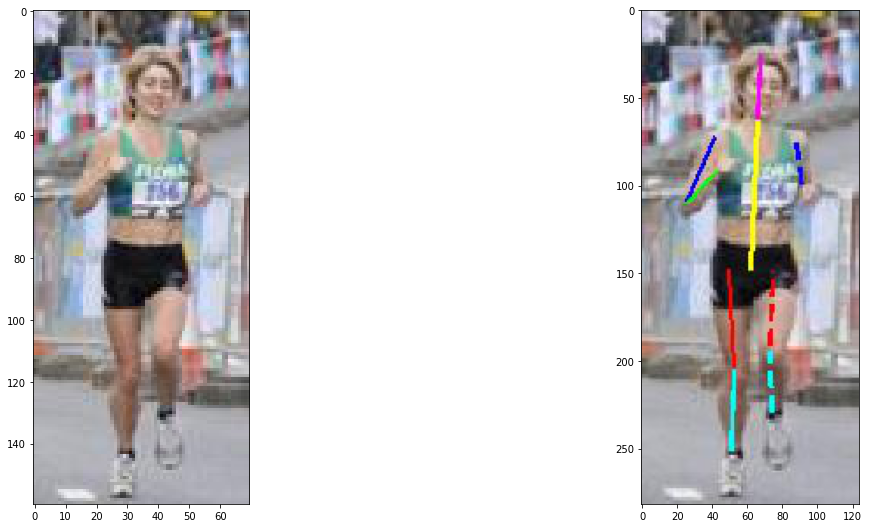

In [3]:
jointsFile = scipy.io.loadmat('lsp_dataset/joints.mat')['joints']
joints = np.empty((2000,14,3))

for i in range(3):
    for j in range(14):
        for k in range(2000):
            joints[k][j][i] = jointsFile[i][j][k]

print('First:')
print(joints[0])
plt.figure(figsize=(20,20))
ax = plt.subplot(2,2,1)
image = img.imread('lsp_dataset/images/im0001.jpg')
plt.imshow(image)
ax = plt.subplot(2,2,2)
image = img.imread('lsp_dataset/visualized/im0001.jpg')
plt.imshow(image)

In [4]:
cols = ['File']

for i in range(1,15):
    cols.append('JX'+str(i))
    cols.append('JY'+str(i))
    cols.append('JB'+str(i))

data = pd.DataFrame(columns=cols)

for i in range(2000):
    dict = {'File': 'im'+str(i+1).zfill(4)}
    for j in range(14):
        dict['JX'+str(j+1)] = [joints[i][j][0]]
        dict['JY'+str(j+1)] = [joints[i][j][1]]
        dict['JB'+str(j+1)] = [joints[i][j][2]]
    df = pd.DataFrame(dict)
    data = pd.concat([data, df], ignore_index=True, axis=0)

data.head(10)

,File,JX1,JY1,JB1,JX2,JY2,JB2,JX3,JY3,JB3,...,JB11,JX12,JY12,JB12,JX13,JY13,JB13,JX14,JY14,JB14
0,im0001,29.746459,143.34544,0.0,30.550107,117.2269,0.0,28.942812,84.679181,0.0,...,0.0,53.855881,58.962464,0.0,38.184757,36.058514,0.0,38.988404,15.565505,0.0
1,im0002,28.120319,166.655102,0.0,49.179443,136.64585,0.0,62.604635,95.843797,0.0,...,0.0,109.461186,96.370275,0.0,81.031368,52.672592,0.0,83.40052,30.823751,0.0
2,im0003,40.516958,81.768626,0.0,27.96569,50.390458,0.0,50.087299,68.903577,0.0,...,0.0,93.546062,96.359474,0.0,95.11497,51.331803,0.0,94.330516,29.680867,0.0
3,im0004,19.627446,137.799656,0.0,52.616825,116.356559,0.0,41.070542,81.305343,0.0,...,1.0,54.266294,94.913462,1.0,55.503396,30.584172,0.0,68.699148,19.450257,0.0
4,im0005,44.817547,151.488358,0.0,51.344251,115.591488,0.0,34.374822,89.484674,0.0,...,0.0,78.756406,45.755761,0.0,51.344251,37.923717,0.0,52.649591,22.259628,0.0
5,im0006,33.921309,161.077479,0.0,61.640773,134.424148,0.0,76.566638,101.374018,0.0,...,0.0,58.442373,91.778819,0.0,90.42637,52.864956,0.0,94.157837,33.674557,0.0
6,im0007,55.566302,32.331391,0.0,80.86308,80.692878,0.0,45.521993,102.641552,1.0,...,0.0,66.726645,95.573335,0.0,94.999515,107.10569,0.0,113.600087,98.921438,0.0
7,im0008,51.741112,156.16428,0.0,55.392565,121.779757,0.0,66.955502,93.176702,0.0,...,0.0,128.725929,94.698141,0.0,80.648454,49.967833,0.0,90.99424,41.143486,0.0
8,im0009,46.266388,146.269615,0.0,59.660645,112.567937,0.0,34.816459,90.532225,0.0,...,0.0,69.382283,50.565492,0.0,42.809806,39.331599,0.0,43.889988,21.184542,0.0
9,im0010,30.933287,149.454617,0.0,52.861749,119.520527,0.0,28.496791,116.73596,0.0,...,0.0,99.85131,54.083212,0.0,54.950174,71.138682,0.0,47.640686,55.475495,0.0


# Modelo